# KNN vs QKNN

In [ ]:
!pip install qiskit==0.42.1 qiskit-machine-learning==0.6.0 qiskit-aer==0.12.0

## Preparación de los datos

In [ ]:
import pandas as pd

data = pd.read_csv("data.csv")

data.head()

,category,amt,state,lat,long,is_fraud,hora,dia,mes,edad,card_type,previous_fraud_client,previous_fraud_merchant,gender_M,periodo_dia_noche,periodo_dia_tarde
0,0.002404,91.82,0.005391,41.6060,-109.2300,0,12,5,8,36,0.005559,1.0,1.0,False,False,False
1,0.001621,38.60,0.005991,37.0581,-86.1938,0,12,5,8,21,0.005652,1.0,1.0,False,False,False
2,0.013720,104.39,0.006025,44.8232,-89.1665,0,7,5,8,66,0.005652,1.0,1.0,True,False,False
3,0.013989,3.68,0.005193,46.5901,-117.1692,0,10,5,8,77,0.005652,1.0,1.0,False,False,False
4,0.013989,1.61,0.006197,42.1939,-76.7361,0,8,5,8,29,0.004766,1.0,1.0,False,False,False


In [ ]:
data_2 = data.drop(['state', 'lat', 'long', 'hora', 'dia', 'mes', 'gender_M', 'periodo_dia_tarde'], axis=1)

data_2.columns

Index(['category', 'amt', 'is_fraud', 'edad', 'card_type',
       'previous_fraud_client', 'previous_fraud_merchant',
       'periodo_dia_noche'],
      dtype='object')

## Estudio Comparativo (Desbalanceo 75-25)

In [ ]:
import pandas as pd

def crear_submuestra_balanceada(df, label_col, total_muestra, proporcion_clase_mayor=0.75):
    # Contar clases
    clases = df['is_fraud'].unique()
    if len(clases) != 2:
        raise ValueError("Este método está pensado para problemas binarios (dos clases).")

    # Determinar cuántas instancias tomar de cada clase
    n_mayor = int(total_muestra * proporcion_clase_mayor)
    n_menor = total_muestra - n_mayor

    # Detectar qué clase es la mayor
    conteos = df['is_fraud'].value_counts()
    clase_mayor = conteos.idxmax()
    clase_menor = conteos.idxmin()

    # Tomar muestras aleatorias
    df_mayor = df[df['is_fraud'] == clase_mayor].sample(n=n_mayor, random_state=42)
    df_menor = df[df['is_fraud'] == clase_menor].sample(n=n_menor, random_state=42)

    # Combinar y mezclar
    df_final = pd.concat([df_mayor, df_menor]).sample(frac=1, random_state=42).reset_index(drop=True)
    return df_final

# Crear muestras
df1 = crear_submuestra_balanceada(data_2, label_col='label', total_muestra=200)
df2 = crear_submuestra_balanceada(data_2, label_col='label', total_muestra=500)

### 200 datos

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

x1 = df1.drop(columns='is_fraud')
y1 = df1['is_fraud']

x1 = np.array(x1, dtype=np.float32)
y1 = np.array(y1, dtype=np.float32)

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    x1, y1, test_size=0.3, stratify=y1, random_state=42
)

#### KNN

k=3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_1, y_train_1)

y_pred_knn = knn.predict(x_test_1)

accuracy_knn_1 = accuracy_score(y_test_1, y_pred_knn)
print("Accuracy KNN:", accuracy_knn_1)
precision_knn_1 = precision_score(y_test_1, y_pred_knn)
print("Precision KNN:", precision_knn_1)
recall_knn_1 = recall_score(y_test_1, y_pred_knn)
print("Recall KNN:", recall_knn_1)
f1_knn_1 = f1_score(y_test_1, y_pred_knn)
print("F1 KNN:", f1_knn_1)
print(classification_report(y_test_1, y_pred_knn))

Accuracy KNN: 0.9166666666666666
Precision KNN: 1.0
Recall KNN: 0.6666666666666666
F1 KNN: 0.8
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        45
         1.0       1.00      0.67      0.80        15

    accuracy                           0.92        60
   macro avg       0.95      0.83      0.87        60
weighted avg       0.93      0.92      0.91        60



k=5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_1, y_train_1)

y_pred_knn = knn.predict(x_test_1)

accuracy_knn_1 = accuracy_score(y_test_1, y_pred_knn)
print("Accuracy KNN:", accuracy_knn_1)
precision_knn_1 = precision_score(y_test_1, y_pred_knn)
print("Precision KNN:", precision_knn_1)
recall_knn_1 = recall_score(y_test_1, y_pred_knn)
print("Recall KNN:", recall_knn_1)
f1_knn_1 = f1_score(y_test_1, y_pred_knn)
print("F1 KNN:", f1_knn_1)
print(classification_report(y_test_1, y_pred_knn))

Accuracy KNN: 0.9333333333333333
Precision KNN: 1.0
Recall KNN: 0.7333333333333333
F1 KNN: 0.8461538461538461
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        45
         1.0       1.00      0.73      0.85        15

    accuracy                           0.93        60
   macro avg       0.96      0.87      0.90        60
weighted avg       0.94      0.93      0.93        60



k=7

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_1, y_train_1)

y_pred_knn = knn.predict(x_test_1)

accuracy_knn_1 = accuracy_score(y_test_1, y_pred_knn)
print("Accuracy KNN:", accuracy_knn_1)
precision_knn_1 = precision_score(y_test_1, y_pred_knn)
print("Precision KNN:", precision_knn_1)
recall_knn_1 = recall_score(y_test_1, y_pred_knn)
print("Recall KNN:", recall_knn_1)
f1_knn_1 = f1_score(y_test_1, y_pred_knn)
print("F1 KNN:", f1_knn_1)
print(classification_report(y_test_1, y_pred_knn))

Accuracy KNN: 0.9166666666666666
Precision KNN: 1.0
Recall KNN: 0.6666666666666666
F1 KNN: 0.8
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        45
         1.0       1.00      0.67      0.80        15

    accuracy                           0.92        60
   macro avg       0.95      0.83      0.87        60
weighted avg       0.93      0.92      0.91        60



k=9

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train_1, y_train_1)

y_pred_knn = knn.predict(x_test_1)

accuracy_knn_1 = accuracy_score(y_test_1, y_pred_knn)
print("Accuracy KNN:", accuracy_knn_1)
precision_knn_1 = precision_score(y_test_1, y_pred_knn)
print("Precision KNN:", precision_knn_1)
recall_knn_1 = recall_score(y_test_1, y_pred_knn)
print("Recall KNN:", recall_knn_1)
f1_knn_1 = f1_score(y_test_1, y_pred_knn)
print("F1 KNN:", f1_knn_1)
print(classification_report(y_test_1, y_pred_knn))

Accuracy KNN: 0.9166666666666666
Precision KNN: 1.0
Recall KNN: 0.6666666666666666
F1 KNN: 0.8
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        45
         1.0       1.00      0.67      0.80        15

    accuracy                           0.92        60
   macro avg       0.95      0.83      0.87        60
weighted avg       0.93      0.92      0.91        60



#### QKNN

In [ ]:
import numpy as np
from qiskit.circuit.library import ZZFeatureMap
from qiskit_aer import Aer
from qiskit_machine_learning.kernels import QuantumKernel

# Codificación de los datos en el circuito cuántico.
feature_map = ZZFeatureMap(x_train_1.shape[1])

# Definimos backend.
quantum_instance = Aer.get_backend('aer_simulator_statevector')

# Creamos el kernel cuántico.
quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=quantum_instance)

In [ ]:
# Creamos el kernel a partir de los datos de entrenamiento.
k_train = quantum_kernel.evaluate(x_vec=x_train_1)

# Calculamos similitudes de cada dato de test respecto a los de train.
k_test_train = quantum_kernel.evaluate(x_vec=x_test_1, y_vec=x_train_1)

In [ ]:
# A partir de lo anterior, para cada dato de test nos quedamos con los K datos de
# entrenamiento más similares y en base a su "y" hacemos la clasificación.
def qknn_predict(K_test_train, y_train, k=5):
    y_pred = []
    for i in range(K_test_train.shape[0]):
        # Obtener índices de los k vecinos más parecidos.
        neighbors_idx = np.argsort(K_test_train[i])[::-1][:k]
        # Obtenemos las clases de vecinos.
        neighbors_labels = y_train[neighbors_idx]
        # Se realiza la clasificación en base a la mayoría.
        counts = np.bincount(neighbors_labels.astype(int))
        y_pred.append(np.argmax(counts))
    return np.array(y_pred)

k=3

In [ ]:
y_pred_qknn = qknn_predict(k_test_train, y_train_1, k=3)

accuracy_qknn_1 = accuracy_score(y_test_1, y_pred_qknn)
print("Accuracy QKNN:", accuracy_qknn_1)
precision_qknn_1 = precision_score(y_test_1, y_pred_qknn)
print("Precision QKNN:", precision_qknn_1)
recall_qknn_1 = recall_score(y_test_1, y_pred_qknn)
print("Recall QKNN:", recall_qknn_1)
f1_qknn_1 = f1_score(y_test_1, y_pred_qknn)
print("F1 QKNN:", f1_qknn_1)
print(classification_report(y_test_1, y_pred_qknn))

Accuracy KNN: 0.7833333333333333
Precision KNN: 0.5833333333333334
Recall KNN: 0.4666666666666667
F1 KNN: 0.5185185185185185
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86        45
         1.0       0.58      0.47      0.52        15

    accuracy                           0.78        60
   macro avg       0.71      0.68      0.69        60
weighted avg       0.77      0.78      0.77        60



k=5

In [ ]:
y_pred_qknn = qknn_predict(k_test_train, y_train_1, k=5)

accuracy_qknn_1 = accuracy_score(y_test_1, y_pred_qknn)
print("Accuracy QKNN:", accuracy_qknn_1)
precision_qknn_1 = precision_score(y_test_1, y_pred_qknn)
print("Precision QKNN:", precision_qknn_1)
recall_qknn_1 = recall_score(y_test_1, y_pred_qknn)
print("Recall QKNN:", recall_qknn_1)
f1_qknn_1 = f1_score(y_test_1, y_pred_qknn)
print("F1 QKNN:", f1_qknn_1)
print(classification_report(y_test_1, y_pred_qknn))

Accuracy QKNN: 0.8333333333333334
Precision QKNN: 0.7272727272727273
Recall QKNN: 0.5333333333333333
F1 QKNN: 0.6153846153846154
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89        45
         1.0       0.73      0.53      0.62        15

    accuracy                           0.83        60
   macro avg       0.79      0.73      0.75        60
weighted avg       0.82      0.83      0.82        60



k=7

In [ ]:
y_pred_qknn = qknn_predict(k_test_train, y_train_1, k=7)

accuracy_qknn_1 = accuracy_score(y_test_1, y_pred_qknn)
print("Accuracy QKNN:", accuracy_qknn_1)
precision_qknn_1 = precision_score(y_test_1, y_pred_qknn)
print("Precision QKNN:", precision_qknn_1)
recall_qknn_1 = recall_score(y_test_1, y_pred_qknn)
print("Recall QKNN:", recall_qknn_1)
f1_qknn_1 = f1_score(y_test_1, y_pred_qknn)
print("F1 QKNN:", f1_qknn_1)
print(classification_report(y_test_1, y_pred_qknn))

Accuracy QKNN: 0.8666666666666667
Precision QKNN: 1.0
Recall QKNN: 0.4666666666666667
F1 QKNN: 0.6363636363636364
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        45
         1.0       1.00      0.47      0.64        15

    accuracy                           0.87        60
   macro avg       0.92      0.73      0.78        60
weighted avg       0.89      0.87      0.85        60



k=9

In [ ]:
y_pred_qknn = qknn_predict(k_test_train, y_train_1, k=3)

accuracy_qknn_1 = accuracy_score(y_test_1, y_pred_qknn)
print("Accuracy QKNN:", accuracy_qknn_1)
precision_qknn_1 = precision_score(y_test_1, y_pred_qknn)
print("Precision QKNN:", precision_qknn_1)
recall_qknn_1 = recall_score(y_test_1, y_pred_qknn)
print("Recall QKNN:", recall_qknn_1)
f1_qknn_1 = f1_score(y_test_1, y_pred_qknn)
print("F1 QKNN:", f1_qknn_1)
print(classification_report(y_test_1, y_pred_qknn))

Accuracy QKNN: 0.7833333333333333
Precision QKNN: 0.5833333333333334
Recall QKNN: 0.4666666666666667
F1 QKNN: 0.5185185185185185
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86        45
         1.0       0.58      0.47      0.52        15

    accuracy                           0.78        60
   macro avg       0.71      0.68      0.69        60
weighted avg       0.77      0.78      0.77        60



### 500 datos

In [ ]:
x1 = df2.drop(columns='is_fraud')
y1 = df2['is_fraud']

x1 = np.array(x1, dtype=np.float32)
y1 = np.array(y1, dtype=np.float32)

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    x1, y1, test_size=0.3, stratify=y1, random_state=42
)

#### KNN

k=3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_1, y_train_1)

y_pred_knn = knn.predict(x_test_1)

accuracy_knn_1 = accuracy_score(y_test_1, y_pred_knn)
print("Accuracy KNN:", accuracy_knn_1)
precision_knn_1 = precision_score(y_test_1, y_pred_knn)
print("Precision KNN:", precision_knn_1)
recall_knn_1 = recall_score(y_test_1, y_pred_knn)
print("Recall KNN:", recall_knn_1)
f1_knn_1 = f1_score(y_test_1, y_pred_knn)
print("F1 KNN:", f1_knn_1)
print(classification_report(y_test_1, y_pred_knn))

Accuracy KNN: 0.9133333333333333
Precision KNN: 0.8333333333333334
Recall KNN: 0.8108108108108109
F1 KNN: 0.821917808219178
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       113
         1.0       0.83      0.81      0.82        37

    accuracy                           0.91       150
   macro avg       0.89      0.88      0.88       150
weighted avg       0.91      0.91      0.91       150



k=5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_1, y_train_1)

y_pred_knn = knn.predict(x_test_1)

accuracy_knn_1 = accuracy_score(y_test_1, y_pred_knn)
print("Accuracy KNN:", accuracy_knn_1)
precision_knn_1 = precision_score(y_test_1, y_pred_knn)
print("Precision KNN:", precision_knn_1)
recall_knn_1 = recall_score(y_test_1, y_pred_knn)
print("Recall KNN:", recall_knn_1)
f1_knn_1 = f1_score(y_test_1, y_pred_knn)
print("F1 KNN:", f1_knn_1)
print(classification_report(y_test_1, y_pred_knn))

Accuracy KNN: 0.9133333333333333
Precision KNN: 0.875
Recall KNN: 0.7567567567567568
F1 KNN: 0.8115942028985508
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       113
         1.0       0.88      0.76      0.81        37

    accuracy                           0.91       150
   macro avg       0.90      0.86      0.88       150
weighted avg       0.91      0.91      0.91       150



k=7

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_1, y_train_1)

y_pred_knn = knn.predict(x_test_1)

accuracy_knn_1 = accuracy_score(y_test_1, y_pred_knn)
print("Accuracy KNN:", accuracy_knn_1)
precision_knn_1 = precision_score(y_test_1, y_pred_knn)
print("Precision KNN:", precision_knn_1)
recall_knn_1 = recall_score(y_test_1, y_pred_knn)
print("Recall KNN:", recall_knn_1)
f1_knn_1 = f1_score(y_test_1, y_pred_knn)
print("F1 KNN:", f1_knn_1)
print(classification_report(y_test_1, y_pred_knn))

Accuracy KNN: 0.9
Precision KNN: 0.8055555555555556
Recall KNN: 0.7837837837837838
F1 KNN: 0.7945205479452054
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       113
         1.0       0.81      0.78      0.79        37

    accuracy                           0.90       150
   macro avg       0.87      0.86      0.86       150
weighted avg       0.90      0.90      0.90       150



k=9

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train_1, y_train_1)

y_pred_knn = knn.predict(x_test_1)

accuracy_knn_1 = accuracy_score(y_test_1, y_pred_knn)
print("Accuracy KNN:", accuracy_knn_1)
precision_knn_1 = precision_score(y_test_1, y_pred_knn)
print("Precision KNN:", precision_knn_1)
recall_knn_1 = recall_score(y_test_1, y_pred_knn)
print("Recall KNN:", recall_knn_1)
f1_knn_1 = f1_score(y_test_1, y_pred_knn)
print("F1 KNN:", f1_knn_1)
print(classification_report(y_test_1, y_pred_knn))

Accuracy KNN: 0.9
Precision KNN: 0.8235294117647058
Recall KNN: 0.7567567567567568
F1 KNN: 0.7887323943661971
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       113
         1.0       0.82      0.76      0.79        37

    accuracy                           0.90       150
   macro avg       0.87      0.85      0.86       150
weighted avg       0.90      0.90      0.90       150



#### QKNN

In [ ]:
# Codificación de los datos en el circuito cuántico.
feature_map = ZZFeatureMap(x_train_1.shape[1])

# Definimos backend.
quantum_instance = Aer.get_backend('aer_simulator_statevector')

# Creamos el kernel cuántico.
quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=quantum_instance)

# Creamos el kernel a partir de los datos de entrenamiento.
k_train = quantum_kernel.evaluate(x_vec=x_train_1)

# Calculamos similitudes de cada dato de test respecto a los de train.
k_test_train = quantum_kernel.evaluate(x_vec=x_test_1, y_vec=x_train_1)

k=3

In [ ]:
y_pred_qknn = qknn_predict(k_test_train, y_train_1, k=3)

accuracy_qknn_1 = accuracy_score(y_test_1, y_pred_qknn)
print("Accuracy QKNN:", accuracy_qknn_1)
precision_qknn_1 = precision_score(y_test_1, y_pred_qknn)
print("Precision QKNN:", precision_qknn_1)
recall_qknn_1 = recall_score(y_test_1, y_pred_qknn)
print("Recall QKNN:", recall_qknn_1)
f1_qknn_1 = f1_score(y_test_1, y_pred_qknn)
print("F1 QKNN:", f1_qknn_1)
print(classification_report(y_test_1, y_pred_qknn))

Accuracy QKNN: 0.8066666666666666
Precision QKNN: 0.7
Recall QKNN: 0.3783783783783784
F1 QKNN: 0.49122807017543857
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       113
         1.0       0.70      0.38      0.49        37

    accuracy                           0.81       150
   macro avg       0.76      0.66      0.69       150
weighted avg       0.79      0.81      0.78       150



k=5

In [ ]:
y_pred_qknn = qknn_predict(k_test_train, y_train_1, k=5)

accuracy_qknn_1 = accuracy_score(y_test_1, y_pred_qknn)
print("Accuracy QKNN:", accuracy_qknn_1)
precision_qknn_1 = precision_score(y_test_1, y_pred_qknn)
print("Precision QKNN:", precision_qknn_1)
recall_qknn_1 = recall_score(y_test_1, y_pred_qknn)
print("Recall QKNN:", recall_qknn_1)
f1_qknn_1 = f1_score(y_test_1, y_pred_qknn)
print("F1 QKNN:", f1_qknn_1)
print(classification_report(y_test_1, y_pred_qknn))

Accuracy QKNN: 0.8133333333333334
Precision QKNN: 0.7142857142857143
Recall QKNN: 0.40540540540540543
F1 QKNN: 0.5172413793103449
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.88       113
         1.0       0.71      0.41      0.52        37

    accuracy                           0.81       150
   macro avg       0.77      0.68      0.70       150
weighted avg       0.80      0.81      0.79       150



k=7

In [ ]:
y_pred_qknn = qknn_predict(k_test_train, y_train_1, k=7)

accuracy_qknn_1 = accuracy_score(y_test_1, y_pred_qknn)
print("Accuracy QKNN:", accuracy_qknn_1)
precision_qknn_1 = precision_score(y_test_1, y_pred_qknn)
print("Precision QKNN:", precision_qknn_1)
recall_qknn_1 = recall_score(y_test_1, y_pred_qknn)
print("Recall QKNN:", recall_qknn_1)
f1_qknn_1 = f1_score(y_test_1, y_pred_qknn)
print("F1 QKNN:", f1_qknn_1)
print(classification_report(y_test_1, y_pred_qknn))

Accuracy QKNN: 0.8133333333333334
Precision QKNN: 0.8461538461538461
Recall QKNN: 0.2972972972972973
F1 QKNN: 0.44
              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89       113
         1.0       0.85      0.30      0.44        37

    accuracy                           0.81       150
   macro avg       0.83      0.64      0.66       150
weighted avg       0.82      0.81      0.78       150



k=9

In [ ]:
y_pred_qknn = qknn_predict(k_test_train, y_train_1, k=9)

accuracy_qknn_1 = accuracy_score(y_test_1, y_pred_qknn)
print("Accuracy QKNN:", accuracy_qknn_1)
precision_qknn_1 = precision_score(y_test_1, y_pred_qknn)
print("Precision QKNN:", precision_qknn_1)
recall_qknn_1 = recall_score(y_test_1, y_pred_qknn)
print("Recall QKNN:", recall_qknn_1)
f1_qknn_1 = f1_score(y_test_1, y_pred_qknn)
print("F1 QKNN:", f1_qknn_1)
print(classification_report(y_test_1, y_pred_qknn))

Accuracy QKNN: 0.82
Precision QKNN: 0.9166666666666666
Recall QKNN: 0.2972972972972973
F1 QKNN: 0.4489795918367347
              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89       113
         1.0       0.92      0.30      0.45        37

    accuracy                           0.82       150
   macro avg       0.86      0.64      0.67       150
weighted avg       0.84      0.82      0.78       150



## Estudio Comparativo (Sin Desbalanceo)

In [ ]:
# Crear muestras
df1 = crear_submuestra_balanceada(data_2, label_col='label', total_muestra=200, proporcion_clase_mayor=0.5)
df2 = crear_submuestra_balanceada(data_2, label_col='label', total_muestra=500, proporcion_clase_mayor=0.5)

### 200 datos

In [ ]:
x1 = df1.drop(columns='is_fraud')
y1 = df1['is_fraud']

x1 = np.array(x1, dtype=np.float32)
y1 = np.array(y1, dtype=np.float32)

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    x1, y1, test_size=0.3, stratify=y1, random_state=42
)

#### KNN

k=3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_1, y_train_1)

y_pred_knn = knn.predict(x_test_1)

accuracy_knn_1 = accuracy_score(y_test_1, y_pred_knn)
print("Accuracy KNN:", accuracy_knn_1)
precision_knn_1 = precision_score(y_test_1, y_pred_knn)
print("Precision KNN:", precision_knn_1)
recall_knn_1 = recall_score(y_test_1, y_pred_knn)
print("Recall KNN:", recall_knn_1)
f1_knn_1 = f1_score(y_test_1, y_pred_knn)
print("F1 KNN:", f1_knn_1)
print(classification_report(y_test_1, y_pred_knn))

Accuracy KNN: 0.8333333333333334
Precision KNN: 0.8571428571428571
Recall KNN: 0.8
F1 KNN: 0.8275862068965517
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84        30
         1.0       0.86      0.80      0.83        30

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



k=5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_1, y_train_1)

y_pred_knn = knn.predict(x_test_1)

accuracy_knn_1 = accuracy_score(y_test_1, y_pred_knn)
print("Accuracy KNN:", accuracy_knn_1)
precision_knn_1 = precision_score(y_test_1, y_pred_knn)
print("Precision KNN:", precision_knn_1)
recall_knn_1 = recall_score(y_test_1, y_pred_knn)
print("Recall KNN:", recall_knn_1)
f1_knn_1 = f1_score(y_test_1, y_pred_knn)
print("F1 KNN:", f1_knn_1)
print(classification_report(y_test_1, y_pred_knn))

Accuracy KNN: 0.8333333333333334
Precision KNN: 0.8571428571428571
Recall KNN: 0.8
F1 KNN: 0.8275862068965517
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84        30
         1.0       0.86      0.80      0.83        30

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



k=7

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_1, y_train_1)

y_pred_knn = knn.predict(x_test_1)

accuracy_knn_1 = accuracy_score(y_test_1, y_pred_knn)
print("Accuracy KNN:", accuracy_knn_1)
precision_knn_1 = precision_score(y_test_1, y_pred_knn)
print("Precision KNN:", precision_knn_1)
recall_knn_1 = recall_score(y_test_1, y_pred_knn)
print("Recall KNN:", recall_knn_1)
f1_knn_1 = f1_score(y_test_1, y_pred_knn)
print("F1 KNN:", f1_knn_1)
print(classification_report(y_test_1, y_pred_knn))

Accuracy KNN: 0.85
Precision KNN: 0.8888888888888888
Recall KNN: 0.8
F1 KNN: 0.8421052631578947
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        30
         1.0       0.89      0.80      0.84        30

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



k=9

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train_1, y_train_1)

y_pred_knn = knn.predict(x_test_1)

accuracy_knn_1 = accuracy_score(y_test_1, y_pred_knn)
print("Accuracy KNN:", accuracy_knn_1)
precision_knn_1 = precision_score(y_test_1, y_pred_knn)
print("Precision KNN:", precision_knn_1)
recall_knn_1 = recall_score(y_test_1, y_pred_knn)
print("Recall KNN:", recall_knn_1)
f1_knn_1 = f1_score(y_test_1, y_pred_knn)
print("F1 KNN:", f1_knn_1)
print(classification_report(y_test_1, y_pred_knn))

Accuracy KNN: 0.85
Precision KNN: 0.8888888888888888
Recall KNN: 0.8
F1 KNN: 0.8421052631578947
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        30
         1.0       0.89      0.80      0.84        30

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



#### QKNN

In [ ]:
# Codificación de los datos en el circuito cuántico.
feature_map = ZZFeatureMap(x_train_1.shape[1])

# Definimos backend.
quantum_instance = Aer.get_backend('aer_simulator_statevector')

# Creamos el kernel cuántico.
quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=quantum_instance)

# Creamos el kernel a partir de los datos de entrenamiento.
k_train = quantum_kernel.evaluate(x_vec=x_train_1)

# Calculamos similitudes de cada dato de test respecto a los de train.
k_test_train = quantum_kernel.evaluate(x_vec=x_test_1, y_vec=x_train_1)

k=3

In [ ]:
y_pred_qknn = qknn_predict(k_test_train, y_train_1, k=3)

accuracy_qknn_1 = accuracy_score(y_test_1, y_pred_qknn)
print("Accuracy QKNN:", accuracy_qknn_1)
precision_qknn_1 = precision_score(y_test_1, y_pred_qknn)
print("Precision QKNN:", precision_qknn_1)
recall_qknn_1 = recall_score(y_test_1, y_pred_qknn)
print("Recall QKNN:", recall_qknn_1)
f1_qknn_1 = f1_score(y_test_1, y_pred_qknn)
print("F1 QKNN:", f1_qknn_1)
print(classification_report(y_test_1, y_pred_qknn))

Accuracy QKNN: 0.7
Precision QKNN: 0.7307692307692307
Recall QKNN: 0.6333333333333333
F1 QKNN: 0.6785714285714286
              precision    recall  f1-score   support

         0.0       0.68      0.77      0.72        30
         1.0       0.73      0.63      0.68        30

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



k=5

In [ ]:
y_pred_qknn = qknn_predict(k_test_train, y_train_1, k=5)

accuracy_qknn_1 = accuracy_score(y_test_1, y_pred_qknn)
print("Accuracy QKNN:", accuracy_qknn_1)
precision_qknn_1 = precision_score(y_test_1, y_pred_qknn)
print("Precision QKNN:", precision_qknn_1)
recall_qknn_1 = recall_score(y_test_1, y_pred_qknn)
print("Recall QKNN:", recall_qknn_1)
f1_qknn_1 = f1_score(y_test_1, y_pred_qknn)
print("F1 QKNN:", f1_qknn_1)
print(classification_report(y_test_1, y_pred_qknn))

Accuracy QKNN: 0.7666666666666667
Precision QKNN: 0.7857142857142857
Recall QKNN: 0.7333333333333333
F1 QKNN: 0.7586206896551724
              precision    recall  f1-score   support

         0.0       0.75      0.80      0.77        30
         1.0       0.79      0.73      0.76        30

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



k=7

In [ ]:
y_pred_qknn = qknn_predict(k_test_train, y_train_1, k=7)

accuracy_qknn_1 = accuracy_score(y_test_1, y_pred_qknn)
print("Accuracy QKNN:", accuracy_qknn_1)
precision_qknn_1 = precision_score(y_test_1, y_pred_qknn)
print("Precision QKNN:", precision_qknn_1)
recall_qknn_1 = recall_score(y_test_1, y_pred_qknn)
print("Recall QKNN:", recall_qknn_1)
f1_qknn_1 = f1_score(y_test_1, y_pred_qknn)
print("F1 QKNN:", f1_qknn_1)
print(classification_report(y_test_1, y_pred_qknn))

Accuracy QKNN: 0.8
Precision QKNN: 0.8
Recall QKNN: 0.8
F1 QKNN: 0.8
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        30
         1.0       0.80      0.80      0.80        30

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



k=9

In [ ]:
y_pred_qknn = qknn_predict(k_test_train, y_train_1, k=9)

accuracy_qknn_1 = accuracy_score(y_test_1, y_pred_qknn)
print("Accuracy QKNN:", accuracy_qknn_1)
precision_qknn_1 = precision_score(y_test_1, y_pred_qknn)
print("Precision QKNN:", precision_qknn_1)
recall_qknn_1 = recall_score(y_test_1, y_pred_qknn)
print("Recall QKNN:", recall_qknn_1)
f1_qknn_1 = f1_score(y_test_1, y_pred_qknn)
print("F1 QKNN:", f1_qknn_1)
print(classification_report(y_test_1, y_pred_qknn))

Accuracy QKNN: 0.7833333333333333
Precision QKNN: 0.84
Recall QKNN: 0.7
F1 QKNN: 0.7636363636363637
              precision    recall  f1-score   support

         0.0       0.74      0.87      0.80        30
         1.0       0.84      0.70      0.76        30

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60



### 500 datos

In [ ]:
x1 = df2.drop(columns='is_fraud')
y1 = df2['is_fraud']

x1 = np.array(x1, dtype=np.float32)
y1 = np.array(y1, dtype=np.float32)

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    x1, y1, test_size=0.3, stratify=y1, random_state=42
)

#### KNN

k=3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_1, y_train_1)

y_pred_knn = knn.predict(x_test_1)

accuracy_knn_1 = accuracy_score(y_test_1, y_pred_knn)
print("Accuracy KNN:", accuracy_knn_1)
precision_knn_1 = precision_score(y_test_1, y_pred_knn)
print("Precision KNN:", precision_knn_1)
recall_knn_1 = recall_score(y_test_1, y_pred_knn)
print("Recall KNN:", recall_knn_1)
f1_knn_1 = f1_score(y_test_1, y_pred_knn)
print("F1 KNN:", f1_knn_1)
print(classification_report(y_test_1, y_pred_knn))

Accuracy KNN: 0.8933333333333333
Precision KNN: 0.9041095890410958
Recall KNN: 0.88
F1 KNN: 0.8918918918918919
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89        75
         1.0       0.90      0.88      0.89        75

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



k=5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_1, y_train_1)

y_pred_knn = knn.predict(x_test_1)

accuracy_knn_1 = accuracy_score(y_test_1, y_pred_knn)
print("Accuracy KNN:", accuracy_knn_1)
precision_knn_1 = precision_score(y_test_1, y_pred_knn)
print("Precision KNN:", precision_knn_1)
recall_knn_1 = recall_score(y_test_1, y_pred_knn)
print("Recall KNN:", recall_knn_1)
f1_knn_1 = f1_score(y_test_1, y_pred_knn)
print("F1 KNN:", f1_knn_1)
print(classification_report(y_test_1, y_pred_knn))

Accuracy KNN: 0.9066666666666666
Precision KNN: 0.9295774647887324
Recall KNN: 0.88
F1 KNN: 0.9041095890410958
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91        75
         1.0       0.93      0.88      0.90        75

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150



k=7

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_1, y_train_1)

y_pred_knn = knn.predict(x_test_1)

accuracy_knn_1 = accuracy_score(y_test_1, y_pred_knn)
print("Accuracy KNN:", accuracy_knn_1)
precision_knn_1 = precision_score(y_test_1, y_pred_knn)
print("Precision KNN:", precision_knn_1)
recall_knn_1 = recall_score(y_test_1, y_pred_knn)
print("Recall KNN:", recall_knn_1)
f1_knn_1 = f1_score(y_test_1, y_pred_knn)
print("F1 KNN:", f1_knn_1)
print(classification_report(y_test_1, y_pred_knn))

Accuracy KNN: 0.9066666666666666
Precision KNN: 0.9295774647887324
Recall KNN: 0.88
F1 KNN: 0.9041095890410958
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91        75
         1.0       0.93      0.88      0.90        75

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150



k=9

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train_1, y_train_1)

y_pred_knn = knn.predict(x_test_1)

accuracy_knn_1 = accuracy_score(y_test_1, y_pred_knn)
print("Accuracy KNN:", accuracy_knn_1)
precision_knn_1 = precision_score(y_test_1, y_pred_knn)
print("Precision KNN:", precision_knn_1)
recall_knn_1 = recall_score(y_test_1, y_pred_knn)
print("Recall KNN:", recall_knn_1)
f1_knn_1 = f1_score(y_test_1, y_pred_knn)
print("F1 KNN:", f1_knn_1)
print(classification_report(y_test_1, y_pred_knn))

Accuracy KNN: 0.9066666666666666
Precision KNN: 0.9295774647887324
Recall KNN: 0.88
F1 KNN: 0.9041095890410958
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91        75
         1.0       0.93      0.88      0.90        75

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150



#### QKNN

In [ ]:
# Codificación de los datos en el circuito cuántico.
feature_map = ZZFeatureMap(x_train_1.shape[1])

# Definimos backend.
quantum_instance = Aer.get_backend('aer_simulator_statevector')

# Creamos el kernel cuántico.
quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=quantum_instance)

# Creamos el kernel a partir de los datos de entrenamiento.
k_train = quantum_kernel.evaluate(x_vec=x_train_1)

# Calculamos similitudes de cada dato de test respecto a los de train.
k_test_train = quantum_kernel.evaluate(x_vec=x_test_1, y_vec=x_train_1)

k=3

In [ ]:
y_pred_qknn = qknn_predict(k_test_train, y_train_1, k=3)

accuracy_qknn_1 = accuracy_score(y_test_1, y_pred_qknn)
print("Accuracy QKNN:", accuracy_qknn_1)
precision_qknn_1 = precision_score(y_test_1, y_pred_qknn)
print("Precision QKNN:", precision_qknn_1)
recall_qknn_1 = recall_score(y_test_1, y_pred_qknn)
print("Recall QKNN:", recall_qknn_1)
f1_qknn_1 = f1_score(y_test_1, y_pred_qknn)
print("F1 QKNN:", f1_qknn_1)
print(classification_report(y_test_1, y_pred_qknn))

Accuracy QKNN: 0.7533333333333333
Precision QKNN: 0.7878787878787878
Recall QKNN: 0.6933333333333334
F1 QKNN: 0.7375886524822695
              precision    recall  f1-score   support

         0.0       0.73      0.81      0.77        75
         1.0       0.79      0.69      0.74        75

    accuracy                           0.75       150
   macro avg       0.76      0.75      0.75       150
weighted avg       0.76      0.75      0.75       150



k=5

In [ ]:
y_pred_qknn = qknn_predict(k_test_train, y_train_1, k=5)

accuracy_qknn_1 = accuracy_score(y_test_1, y_pred_qknn)
print("Accuracy QKNN:", accuracy_qknn_1)
precision_qknn_1 = precision_score(y_test_1, y_pred_qknn)
print("Precision QKNN:", precision_qknn_1)
recall_qknn_1 = recall_score(y_test_1, y_pred_qknn)
print("Recall QKNN:", recall_qknn_1)
f1_qknn_1 = f1_score(y_test_1, y_pred_qknn)
print("F1 QKNN:", f1_qknn_1)
print(classification_report(y_test_1, y_pred_qknn))

Accuracy QKNN: 0.8133333333333334
Precision QKNN: 0.8133333333333334
Recall QKNN: 0.8133333333333334
F1 QKNN: 0.8133333333333334
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81        75
         1.0       0.81      0.81      0.81        75

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150



k=7

In [ ]:
y_pred_qknn = qknn_predict(k_test_train, y_train_1, k=7)

accuracy_qknn_1 = accuracy_score(y_test_1, y_pred_qknn)
print("Accuracy QKNN:", accuracy_qknn_1)
precision_qknn_1 = precision_score(y_test_1, y_pred_qknn)
print("Precision QKNN:", precision_qknn_1)
recall_qknn_1 = recall_score(y_test_1, y_pred_qknn)
print("Recall QKNN:", recall_qknn_1)
f1_qknn_1 = f1_score(y_test_1, y_pred_qknn)
print("F1 QKNN:", f1_qknn_1)
print(classification_report(y_test_1, y_pred_qknn))

Accuracy QKNN: 0.8
Precision QKNN: 0.835820895522388
Recall QKNN: 0.7466666666666667
F1 QKNN: 0.7887323943661971
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81        75
         1.0       0.84      0.75      0.79        75

    accuracy                           0.80       150
   macro avg       0.80      0.80      0.80       150
weighted avg       0.80      0.80      0.80       150



k=9

In [ ]:
y_pred_qknn = qknn_predict(k_test_train, y_train_1, k=9)

accuracy_qknn_1 = accuracy_score(y_test_1, y_pred_qknn)
print("Accuracy QKNN:", accuracy_qknn_1)
precision_qknn_1 = precision_score(y_test_1, y_pred_qknn)
print("Precision QKNN:", precision_qknn_1)
recall_qknn_1 = recall_score(y_test_1, y_pred_qknn)
print("Recall QKNN:", recall_qknn_1)
f1_qknn_1 = f1_score(y_test_1, y_pred_qknn)
print("F1 QKNN:", f1_qknn_1)
print(classification_report(y_test_1, y_pred_qknn))

Accuracy QKNN: 0.8
Precision QKNN: 0.8169014084507042
Recall QKNN: 0.7733333333333333
F1 QKNN: 0.7945205479452054
              precision    recall  f1-score   support

         0.0       0.78      0.83      0.81        75
         1.0       0.82      0.77      0.79        75

    accuracy                           0.80       150
   macro avg       0.80      0.80      0.80       150
weighted avg       0.80      0.80      0.80       150



## Resultados

### Accuracy con desbalance

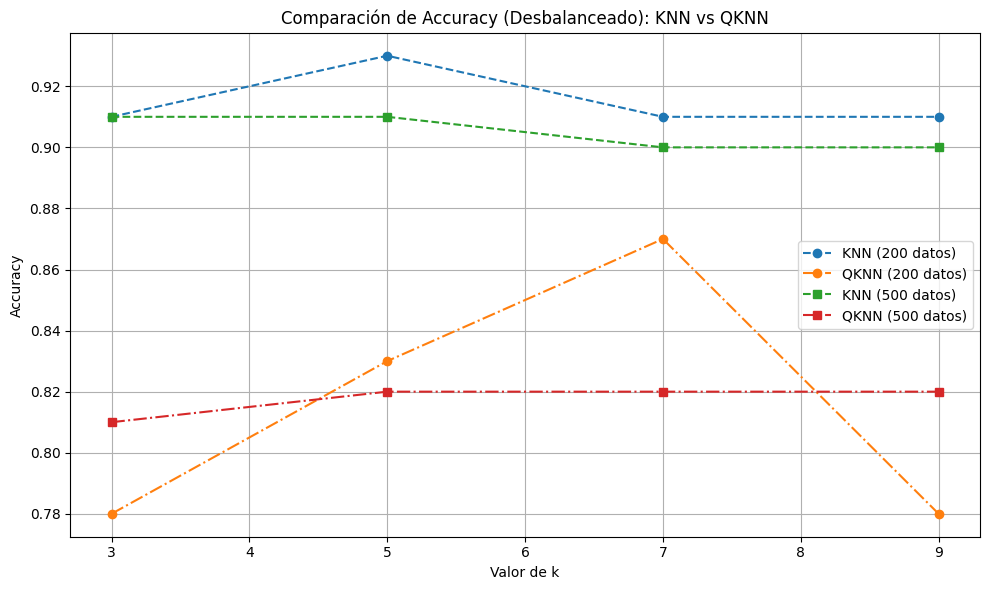

In [ ]:
import matplotlib.pyplot as plt

# Simulación de resultados.
k_values = [3, 5, 7, 9]

# Accuracy para cada combinación.
acc_knn_200 = [0.91, 0.93, 0.91, 0.91]
acc_qknn_200 = [0.78, 0.83, 0.87, 0.78]
acc_knn_500 = [0.91, 0.91, 0.9, 0.9]
acc_qknn_500 = [0.81, 0.82, 0.82, 0.82]

plt.figure(figsize=(10, 6))

# Graficamos cada línea
plt.plot(k_values, acc_knn_200, marker='o', label='KNN (200 datos)', linestyle='--')
plt.plot(k_values, acc_qknn_200, marker='o', label='QKNN (200 datos)', linestyle='-.')

plt.plot(k_values, acc_knn_500, marker='s', label='KNN (500 datos)', linestyle='--')
plt.plot(k_values, acc_qknn_500, marker='s', label='QKNN (500 datos)', linestyle='-.')

# Añadimos etiquetas
plt.xlabel('Valor de k')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy (Desbalanceado): KNN vs QKNN')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### F1 con desbalance

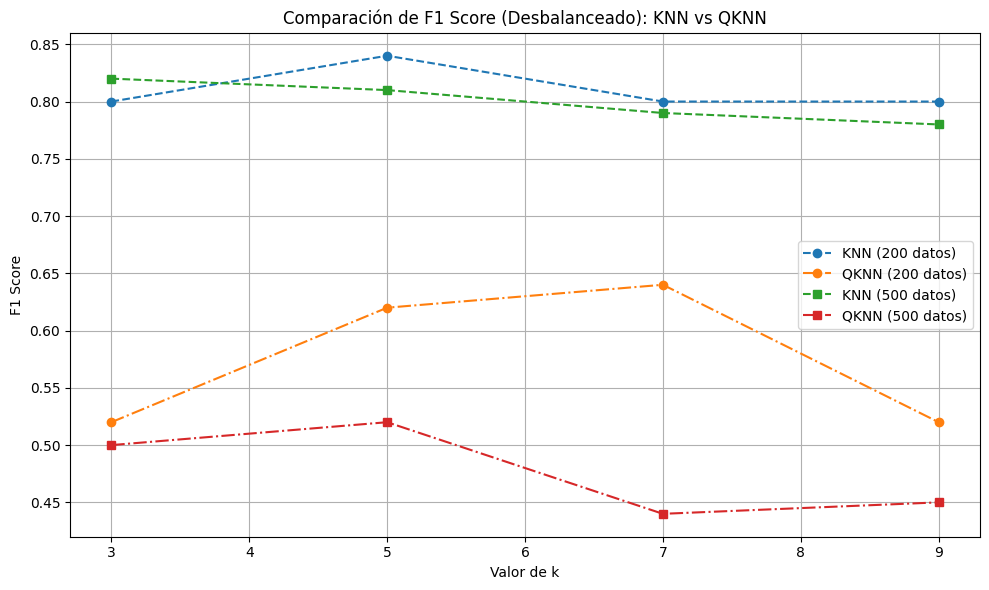

In [ ]:
# Simulación de resultados.
k_values = [3, 5, 7, 9]

# Accuracy para cada combinación.
acc_knn_200 = [0.8, 0.84, 0.8, 0.8]
acc_qknn_200 = [0.52, 0.62, 0.64, 0.52]
acc_knn_500 = [0.82, 0.81, 0.79, 0.78]
acc_qknn_500 = [0.5, 0.52, 0.44, 0.45]

plt.figure(figsize=(10, 6))

# Graficamos cada línea
plt.plot(k_values, acc_knn_200, marker='o', label='KNN (200 datos)', linestyle='--')
plt.plot(k_values, acc_qknn_200, marker='o', label='QKNN (200 datos)', linestyle='-.')

plt.plot(k_values, acc_knn_500, marker='s', label='KNN (500 datos)', linestyle='--')
plt.plot(k_values, acc_qknn_500, marker='s', label='QKNN (500 datos)', linestyle='-.')

# Añadimos etiquetas
plt.xlabel('Valor de k')
plt.ylabel('F1 Score')
plt.title('Comparación de F1 Score (Desbalanceado): KNN vs QKNN')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Accuracy sin desbalance

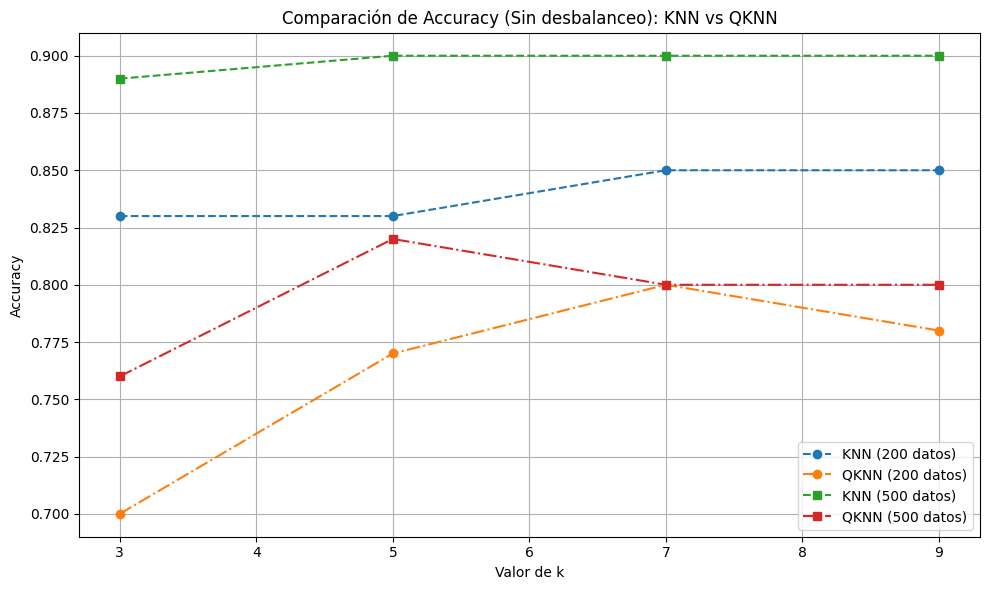

In [ ]:
# Simulación de resultados.
k_values = [3, 5, 7, 9]

# Accuracy para cada combinación.
acc_knn_200 = [0.83, 0.83, 0.85, 0.85]
acc_qknn_200 = [0.7, 0.77, 0.8, 0.78]
acc_knn_500 = [0.89, 0.9, 0.9, 0.9]
acc_qknn_500 = [0.76, 0.82, 0.8, 0.8]

plt.figure(figsize=(10, 6))

# Graficamos cada línea
plt.plot(k_values, acc_knn_200, marker='o', label='KNN (200 datos)', linestyle='--')
plt.plot(k_values, acc_qknn_200, marker='o', label='QKNN (200 datos)', linestyle='-.')

plt.plot(k_values, acc_knn_500, marker='s', label='KNN (500 datos)', linestyle='--')
plt.plot(k_values, acc_qknn_500, marker='s', label='QKNN (500 datos)', linestyle='-.')

# Añadimos etiquetas
plt.xlabel('Valor de k')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy (Sin desbalanceo): KNN vs QKNN')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### F1 sin desbalance

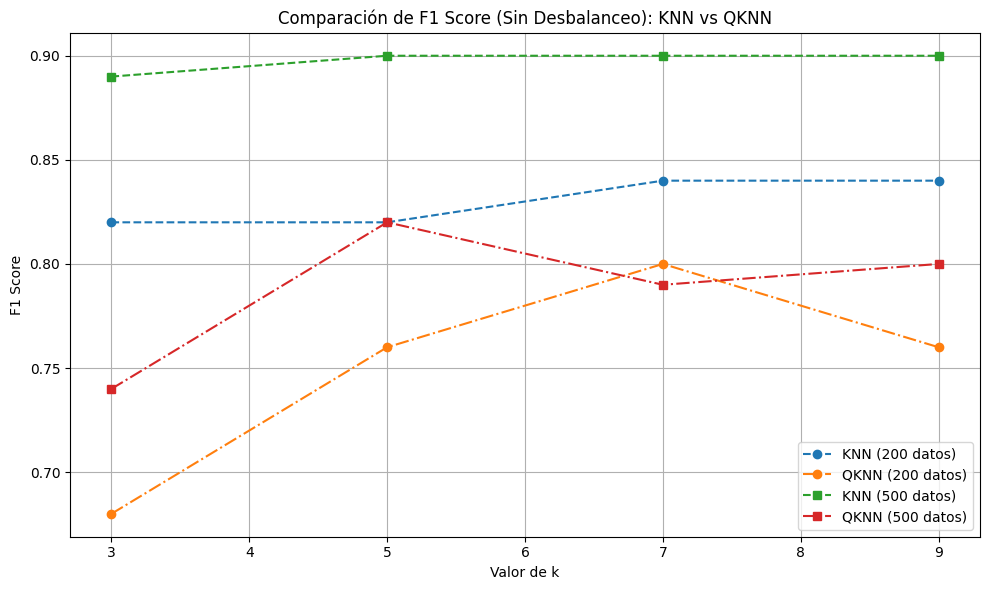

In [ ]:
# Simulación de resultados.
k_values = [3, 5, 7, 9]

# Accuracy para cada combinación.
acc_knn_200 = [0.82, 0.82, 0.84, 0.84]
acc_qknn_200 = [0.68, 0.76, 0.8, 0.76]
acc_knn_500 = [0.89, 0.9, 0.9, 0.9]
acc_qknn_500 = [0.74, 0.82, 0.79, 0.8]

plt.figure(figsize=(10, 6))

# Graficamos cada línea
plt.plot(k_values, acc_knn_200, marker='o', label='KNN (200 datos)', linestyle='--')
plt.plot(k_values, acc_qknn_200, marker='o', label='QKNN (200 datos)', linestyle='-.')

plt.plot(k_values, acc_knn_500, marker='s', label='KNN (500 datos)', linestyle='--')
plt.plot(k_values, acc_qknn_500, marker='s', label='QKNN (500 datos)', linestyle='-.')

# Añadimos etiquetas
plt.xlabel('Valor de k')
plt.ylabel('F1 Score')
plt.title('Comparación de F1 Score (Sin Desbalanceo): KNN vs QKNN')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()